In [5]:
#pip install pandas scikit-learn folium matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import IFrame

In [6]:
df = pd.read_csv('UK_Accident.csv')

In [7]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504145,464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
1504146,464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,NaN,NaN,2,Yes,NaN,2014
1504147,464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,NaN,NaN,2,Yes,NaN,2014
1504148,464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,NaN,NaN,2,Yes,NaN,2014


In [8]:
selected_columns = df[["Accident_Index", "Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude", "Latitude"]]

In [9]:
selected_columns_cleaned = selected_columns.dropna()

In [10]:
print("\nSelected Columns After Cleaning:")
print(selected_columns_cleaned.head())


Selected Columns After Cleaning:
  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  
0  51.489096  
1  51.520075  
2  51.525301  
3  51.482442  
4  51.495752  


In [11]:
null_values = selected_columns.isnull().sum()

In [12]:
print("Null Values in Selected Columns:")
print(null_values)

Null Values in Selected Columns:
Accident_Index              0
Location_Easting_OSGR     101
Location_Northing_OSGR      0
Longitude                 101
Latitude                    0
dtype: int64


In [22]:
# Replacing null values with mean of each column
df_filled = selected_columns.fillna(selected_columns.mean())

print("DataFrame after replacing null values with mean:")
print(df_filled)

In [13]:
duplicates = selected_columns[selected_columns.duplicated(keep=False)]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
        Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
26819         2.01E+12               350430.0                487080.0   
26823         2.01E+12               339280.0                555880.0   
26827         2.01E+12               364630.0                541840.0   
26878         2.01E+12               340380.0                527820.0   
26879         2.01E+12               351650.0                492910.0   
...                ...                    ...                     ...   
1499720       2.01E+12               327780.0                675620.0   
1499725       2.01E+12               326230.0                674690.0   
1499728       2.01E+12               331370.0                671630.0   
1499873       2.01E+12               280571.0                688999.0   
1504056       2.01E+12               303747.0                611253.0   

         Longitude   Latitude  
26819    -2.762786  54.276956  
26823    -2.948252  54.893971  
26827    -2

In [14]:
selected_columns_reduced = selected_columns.head(100)

In [15]:
print(selected_columns_reduced)

   Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0   200501BS00001               525680.0                178240.0  -0.191170   
1   200501BS00002               524170.0                181650.0  -0.211708   
2   200501BS00003               524520.0                182240.0  -0.206458   
3   200501BS00004               526900.0                177530.0  -0.173862   
4   200501BS00005               528060.0                179040.0  -0.156618   
..            ...                    ...                     ...        ...   
95  200501BS70077               524430.0                181060.0  -0.208171   
96  200501BS70078               524050.0                179700.0  -0.214123   
97  200501BS70079               526090.0                177600.0  -0.185496   
98  200501BS70080               525370.0                180290.0  -0.194905   
99  200501BS70082               525350.0                178030.0  -0.195995   

     Latitude  
0   51.489096  
1   51.520075  
2  

In [19]:
# # Plot for Road Surface Conditions with adjusted figure size
# plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
# selected_columns['Road_Surface_Conditions'].value_counts().plot(kind='bar', color='skyblue')
# plt.title('Road Surface Conditions')
# plt.xlabel('Condition')
# plt.ylabel('Count')
# plt.show()

# # Plot for Weather Conditions with adjusted figure size
# plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
# selected_columns['Weather_Conditions'].value_counts().plot(kind='bar', color='lightgreen')
# plt.title('Weather Conditions')
# plt.xlabel('Condition')
# plt.ylabel('Count')
# plt.show()


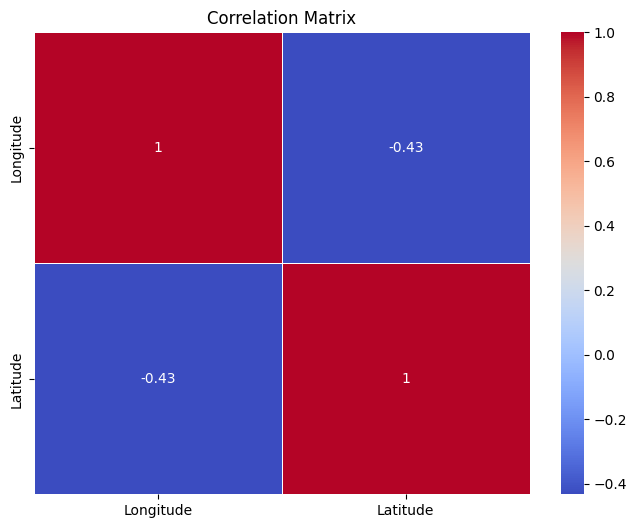

In [16]:
import seaborn as sns

# Create a subset with numerical columns
numerical_subset = selected_columns[[ "Longitude", "Latitude"]]

# Compute the correlation matrix
correlation_matrix = numerical_subset.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [18]:
# plt.figure(figsize=(10, 5))
# selected_columns['Number_of_Casualties'].value_counts().sort_index().plot(kind='bar', color='orange')
# plt.title('Distribution of Number of Casualties')
# plt.xlabel('Number of Casualties')
# plt.ylabel('Count')
# plt.show()


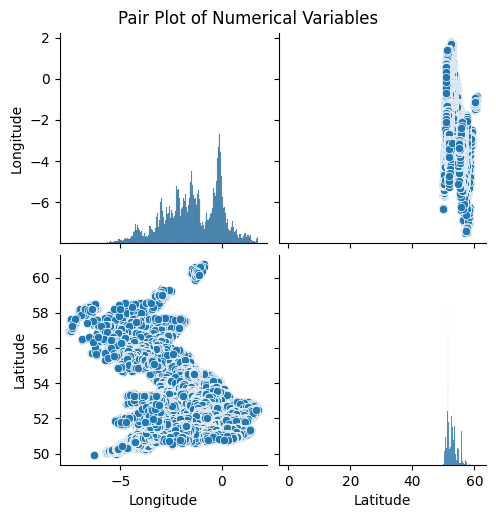

In [17]:
sns.pairplot(selected_columns[[ "Longitude", "Latitude"]])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


In [20]:

# data = selected_columns.copy()

# data['Accident_Severity'] = (data['Number_of_Casualties'] > 1).astype(int)

# # relevant features for analysis
# features = ['Weather_Conditions', 'Road_Surface_Conditions']

# # Preprocess the data
# le = LabelEncoder()
# data['Weather_Conditions'] = le.fit_transform(data['Weather_Conditions'])
# data['Road_Surface_Conditions'] = le.fit_transform(data['Road_Surface_Conditions'])

# # training and testing sets
# X = data[features]
# y = data['Accident_Severity']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)